/tmp/ipykernel_3554911/28595326.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tallinn['ToimKpv'] = pd.to_datetime(tallinn['ToimKpv'], errors='coerce')
/tmp/ipykernel_3554911/28595326.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tallinn['ToimKell'] = tallinn['ToimKell'].fillna('00:00')
/tmp/ipykernel_3554911/28595326.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

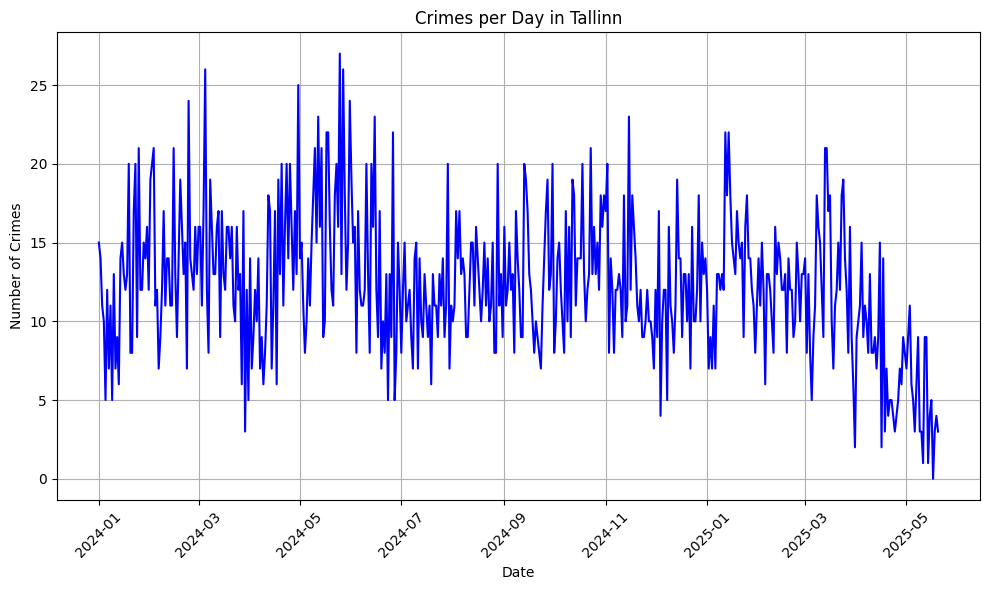

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
dat = pd.read_csv('/home/maria/CrimeStats/data/avalik_1(1).csv', sep='\t')

# Filter for crimes in Tallinn
tallinn = dat[dat['ValdLinnNimetus'] == 'Tallinn']

# Combine date and time columns into a single datetime column
# Parse the 'ToimKpv' as a date
tallinn['ToimKpv'] = pd.to_datetime(tallinn['ToimKpv'], errors='coerce')

# For 'ToimKell', we'll fill NaN values with '00:00' and then parse it as time
tallinn['ToimKell'] = tallinn['ToimKell'].fillna('00:00')

# Convert 'ToimKell' to a proper timedelta (hours and minutes)
tallinn['ToimKell'] = pd.to_timedelta(tallinn['ToimKell'] + ':00')  # Append ':00' to get HH:MM:SS format

# Create a new column by adding the date and time together
tallinn['ToimDatetime'] = tallinn['ToimKpv'] + tallinn['ToimKell']

# Drop rows where the datetime could not be parsed
tallinn = tallinn.dropna(subset=['ToimDatetime'])

# Set the index to the new datetime column
tallinn.set_index('ToimDatetime', inplace=True)

# Bin the data by day and count the number of crimes per day
crimes_per_day = tallinn.resample('D').size()

# Plot the time series of crimes per day
plt.figure(figsize=(10, 6))
plt.plot(crimes_per_day.index, crimes_per_day.values, label='Crimes per Day', color='blue')
plt.title('Crimes per Day in Tallinn')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [2]:
dat=crimes_per_day.values
print(dat)

[15 14 11 10  5 12  7 11  5 13  7  9  6 14 15 13 12 13 20  8  8 17 20  9
 21 12 12 15 14 16 12 19 20 21 11 12  7  9 12 17 11 14 14 11 11 21 13  9
 14 19 16 13 15  7 24 14 13 12 16 13 16 16 11 17 26 12  8 19 16 13 13 16
 17  9 17 13 12 16 16 14 16 11 10 16 12 13  6 17  3 12  5 14  7  9 12 10
 14  7  9  6  8 11 18 17  7 11 17  6 19 13 20 11 16 20 14 20 16 12 17 13
 25 14 15 11  8 10 14 11 15 18 21 15 23 16 21  9 10 22 22 16 12 11 18 20
 16 27 13 26 18 12 15 24 19 15 16  8 17 12 11 11 12 20 13  8 20 16 23 12
  9 17  7 10  8 13  5 13  9 22  5  8 15 12  8 12 15 10 11 12  9  7 14 15
  7 14 10  9 13 11  9 11  6 13 11 11  9 13 11 14  9 11 20  7 11 10 11 17
 14 17 13 14 13  9  9 12 15 15 11 16 14 12 10 12 15 11 14 10 11 15  8  8
 20 11 13  9 16 11 12 15 12 13  8 17 14 12  9  9 20 19 17 13 12 10  8 10
  9  8  7 11 14 17 19 12 13 20  8 10 14 15 12 10  8 17 10 16  9 19 18 11
 14 14 14 20 13 10 12 13 21 13 16 13 15 12 18 16 18 17 20  8 14 12  8 12
 12 13 12  9 18 10 11 23 12 18 16 14 11 10 12  9  9

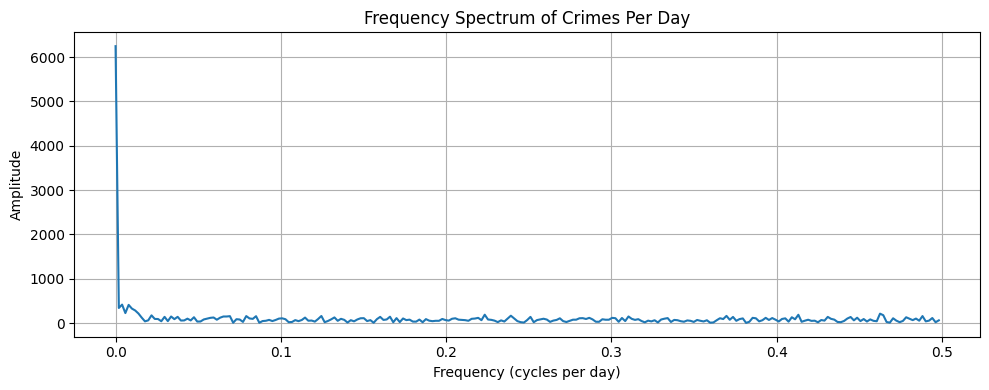

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `dat` is a 1D NumPy array of crime counts per day
# Example: dat = crimes_per_day.values

# Step 1: Compute the DFT
fft_vals = np.fft.fft(dat)

# Step 2: Compute frequencies (assuming one sample per day)
n = len(dat)
freqs = np.fft.fftfreq(n, d=1)  # d=1 means 1 day between samples

# Step 3: Compute the amplitude spectrum (absolute value)
amplitude = np.abs(fft_vals)

# Step 4: Plot only the positive frequencies
half_n = n // 2
plt.figure(figsize=(10, 4))
plt.plot(freqs[:half_n], amplitude[:half_n])
plt.title("Frequency Spectrum of Crimes Per Day")
plt.xlabel("Frequency (cycles per day)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


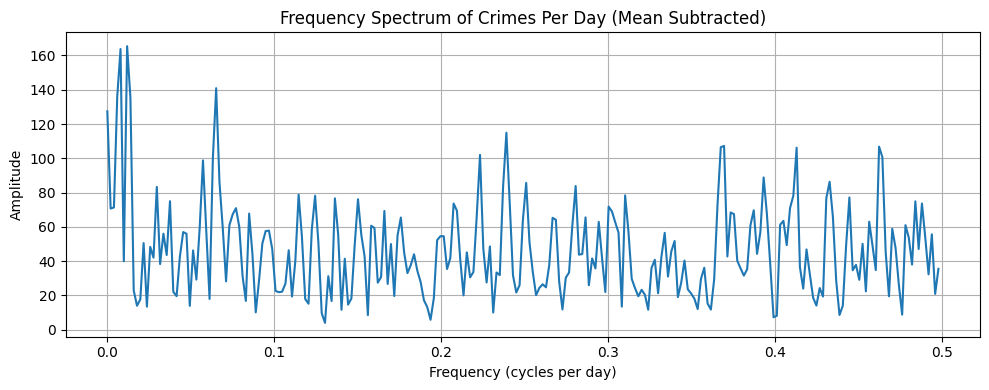

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Subtract mean
dat_centered = dat - np.mean(dat)

# Optional: apply window to reduce leakage
window = np.hanning(len(dat_centered))
dat_windowed = dat_centered * window

# FFT
fft_vals = np.fft.fft(dat_windowed)
freqs = np.fft.fftfreq(len(dat_windowed), d=1)
amplitude = np.abs(fft_vals)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(freqs)//2], amplitude[:len(amplitude)//2])
plt.title("Frequency Spectrum of Crimes Per Day (Mean Subtracted)")
plt.xlabel("Frequency (cycles per day)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


/home/maria/CrimeStats/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/maria/CrimeStats/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


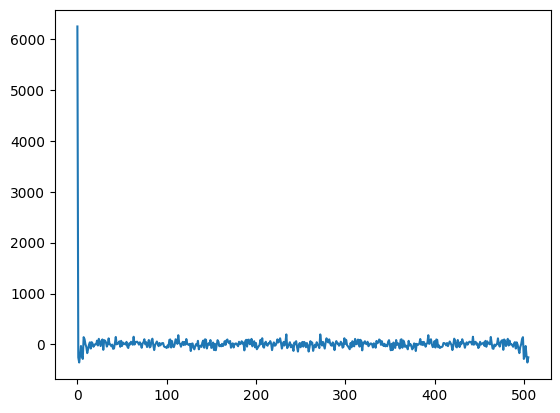

In [5]:
fft_vals

plt.plot(fft_vals)

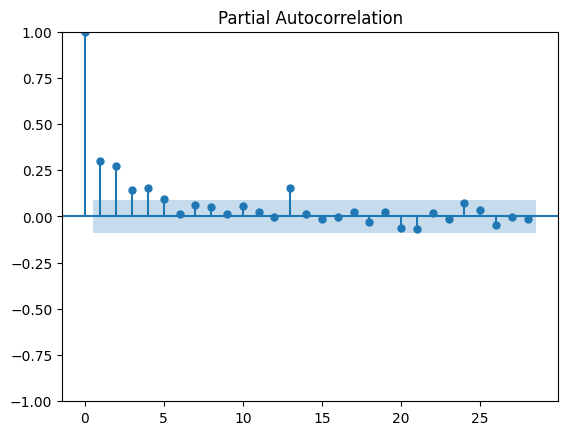

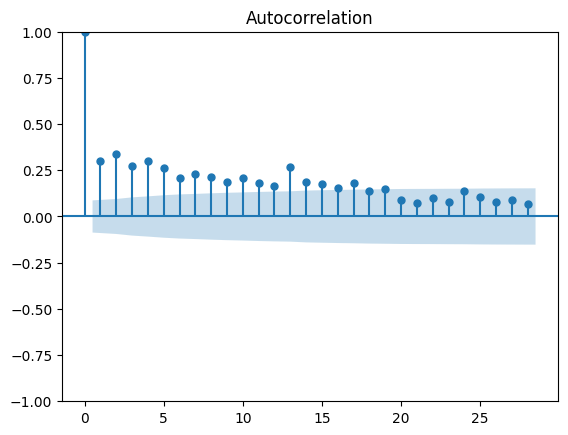

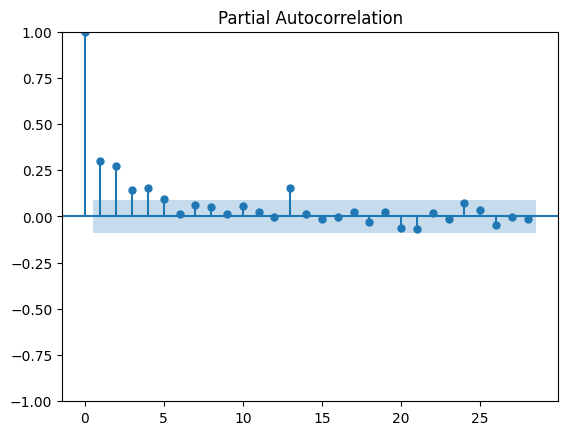

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(dat)
plot_pacf(dat)